# House Prices: Advanced Regression Techniques
Kaggle : Predict sales prices and practice feature engineering, RFs, and gradient boosting

## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

## Dataset load

In [2]:
houseData = pd.read_csv('house-pr/train.csv')
kaggle_test = pd.read_csv('house-pr/test.csv')
houseData

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
houseData.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


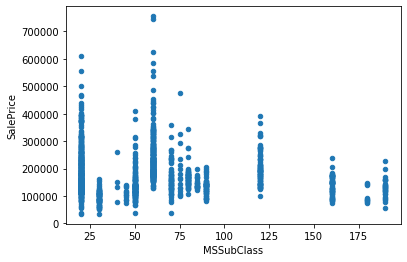

In [4]:
houseData.plot.scatter(x='MSSubClass',y='SalePrice')

In [5]:
houseData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Data Preprocess

In [6]:
#drop non-important features which doesnt affect prediction by having similar values in all records or having large numbers of NA
houseData = houseData.drop(columns=['Utilities','LotFrontage','Alley','FireplaceQu','PoolQC','Fence','MiscFeature','Street'])
kaggle_test = kaggle_test.drop(columns=['Utilities','LotFrontage','Alley','FireplaceQu','PoolQC','Fence','MiscFeature','Street'])


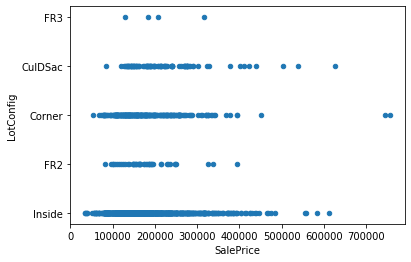

In [7]:

houseData.plot.scatter(x='SalePrice',y='LotConfig')

In [8]:
houseData.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       

In [9]:
#find categorical columns with mask
mask = houseData.dtypes == object
categorical_cols = houseData.columns[mask].tolist()

#apply labelencoder
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
houseData = houseData.dropna()

houseData = houseData.fillna('')
#kaggle_test = kaggle_test.fillna(0)

for c in (categorical_cols):
    le.fit(pd.concat([houseData[c].astype(str),kaggle_test[c].astype(str)]))
    houseData[c] = le.transform(houseData[c].astype(str))
    kaggle_test[c] = le.transform(kaggle_test[c].astype(str))

# use lambda to convert category into numerical values
#houseData[categorical_cols] = houseData[categorical_cols].apply(lambda col: le.fit_transform(col))
houseData[categorical_cols]

,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,3,3,3,4,0,5,2,2,0,5,...,4,2,6,1,1,4,4,2,8,4
1,3,3,3,2,0,24,1,2,0,2,...,4,3,6,1,1,4,4,2,8,4
2,3,0,3,4,0,5,2,2,0,5,...,4,2,6,1,1,4,4,2,8,4
3,3,0,3,0,0,6,2,2,0,5,...,4,2,6,5,2,4,4,2,8,0
4,3,0,3,2,0,15,2,2,0,5,...,4,2,6,1,1,4,4,2,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3,3,3,4,0,8,2,2,0,5,...,4,3,6,1,1,4,4,2,8,4
1456,3,3,3,4,0,14,2,2,0,2,...,4,3,2,1,2,4,4,2,8,4
1457,3,3,3,4,0,6,2,2,0,5,...,4,2,6,1,1,4,4,2,8,4
1458,3,3,3,4,0,12,2,2,0,2,...,0,2,6,1,2,4,4,2,8,4


In [10]:

#drop unneccesary columns
from sklearn.feature_selection import VarianceThreshold
def variance_threshold_selector(data, threshold=0.5):
    selector = VarianceThreshold(threshold)
    selector.fit(data)
    return data[data.columns[selector.get_support(indices=True)]]


print('Length of Data before Varience : ',len(houseData.columns))
houseData = variance_threshold_selector(houseData,0.1)
print('Length of Data after Varience : ',len(houseData.columns))
kaggle_test = kaggle_test[houseData.columns[:-1]]
houseData = houseData[houseData.columns[1:]]
houseData

Length of Data before Varience :  73
Length of Data after Varience :  67


,MSSubClass,MSZoning,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,8450,3,3,4,5,2,0,5,...,0,0,0,0,0,2,2008,8,4,208500
1,20,3,9600,3,3,2,24,1,0,2,...,0,0,0,0,0,5,2007,8,4,181500
2,60,3,11250,0,3,4,5,2,0,5,...,0,0,0,0,0,9,2008,8,4,223500
3,70,3,9550,0,3,0,6,2,0,5,...,272,0,0,0,0,2,2006,8,0,140000
4,60,3,14260,0,3,2,15,2,0,5,...,0,0,0,0,0,12,2008,8,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,3,7917,3,3,4,8,2,0,5,...,0,0,0,0,0,8,2007,8,4,175000
1456,20,3,13175,3,3,4,14,2,0,2,...,0,0,0,0,0,2,2010,8,4,210000
1457,70,3,9042,3,3,4,6,2,0,5,...,0,0,0,0,2500,5,2010,8,4,266500
1458,20,3,9717,3,3,4,12,2,0,2,...,112,0,0,0,0,4,2010,8,4,142125


## Train and Test Split

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(houseData,houseData['SalePrice'],test_size=0.01)
x_train = x_train.drop(['SalePrice'],axis=1)
x_test = x_test.drop(['SalePrice'],axis=1)

y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)
x_train

,MSSubClass,MSZoning,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1205,20,3,14684,0,3,1,20,2,0,2,...,70,0,0,0,0,0,6,2009,8,4
965,60,3,10237,3,3,4,8,6,0,5,...,72,0,0,0,0,0,7,2007,6,5
118,60,3,12376,3,3,0,20,2,0,5,...,0,0,0,0,0,0,5,2010,8,4
183,50,4,11426,3,3,4,17,2,0,0,...,238,0,0,0,0,0,6,2008,8,4
153,20,3,13500,3,3,4,4,2,0,2,...,0,0,0,0,0,0,3,2008,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478,20,3,10637,3,3,4,5,2,0,2,...,44,0,0,0,0,0,9,2009,8,4
1456,20,3,13175,3,3,4,14,2,0,2,...,0,0,0,0,0,0,2,2010,8,4
1295,20,3,8400,3,3,4,12,1,0,2,...,0,0,0,0,0,0,11,2006,8,4
95,60,3,9765,1,3,0,8,2,0,5,...,63,0,0,0,0,480,4,2009,8,4


In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)  # Don't cheat - fit only on training data
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

kaggle_id = kaggle_test['Id']
kaggle_test = scaler.transform(kaggle_test[kaggle_test.columns[1:]])

'''
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)
x_train = poly.fit_transform(x_train)
x_test = poly.transform(x_test)'''

'\nfrom sklearn.preprocessing import PolynomialFeatures\npoly = PolynomialFeatures(2)\nx_train = poly.fit_transform(x_train)\nx_test = poly.transform(x_test)'

## Model Creation and Training

In [13]:
from sklearn.linear_model import LinearRegression
linearReg = LinearRegression()
linearReg.fit(x_train,y_train)

from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=37)
neigh.fit(x_train, y_train)

from sklearn.linear_model import LogisticRegression
logisReg = LogisticRegression()
logisReg.fit(x_train, y_train)

from sklearn.svm import LinearSVR
svmReg = LinearSVR(max_iter=3000,loss='squared_epsilon_insensitive')
svmReg.fit(x_train, y_train)

from sklearn.ensemble import RandomForestRegressor
RandomForest = RandomForestRegressor(n_estimators=180)
RandomForest.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ),

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=180, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [14]:
y_test['linearRegPred'] = linearReg.predict(x_test)
y_test['RandomForest']  = RandomForest.predict(x_test)
y_test['neigh'] = neigh.predict(x_test)
y_test['logistic Reg'] = logisReg.predict(x_test)
y_test['svmReg'] = svmReg.predict(x_test)
x_test

array([[ 9.78808878e-02, -4.13304906e-02, -2.24300802e-01,
         7.71943912e-01,  3.10693093e-01,  6.13703448e-01,
         2.72724627e-01, -6.01829136e-02, -3.92420114e-01,
         9.97085982e-01,  1.34736227e+00,  3.68046965e-01,
         9.54769625e-01,  7.60961951e-01, -5.04874381e-01,
        -1.26360393e-01,  7.48314127e-01,  7.54370172e-01,
         3.97550341e-01, -5.99843779e-01, -7.51443196e-01,
         3.58003493e-01,  8.84456337e-01, -2.84099519e-01,
         2.79124437e-01,  6.50087022e-01, -3.85717629e-01,
         3.88798908e-01,  3.16711056e-01, -2.95694453e-01,
        -9.43911746e-01, -7.02549799e-01, -8.64831875e-01,
         2.76524775e-01, -9.44962225e-01,  1.13918636e+00,
        -1.04292812e-01,  2.49034210e-01,  1.09326827e+00,
         7.82872171e-01,  1.18702348e+00,  1.75168234e-01,
        -3.96719012e-01, -3.46112762e-01,  2.43644136e-01,
        -1.00470581e+00, -7.08852011e-01,  9.12329390e-01,
        -1.45064138e+00,  2.11428192e-01,  1.49761856e-0

# Accuracy of Model

In [15]:
from sklearn.metrics import mean_squared_error
linearRegRMSE  = mean_squared_error(y_test['SalePrice'], y_test['linearRegPred'], squared=False)
randomForRMSE = mean_squared_error(y_test['SalePrice'], y_test['RandomForest'], squared=False)
neighRMSE = mean_squared_error(y_test['SalePrice'], y_test['neigh'], squared=False)
logisRMSE = mean_squared_error(y_test['SalePrice'], y_test['logistic Reg'], squared=False)
svmRMSE = mean_squared_error(y_test['SalePrice'], y_test['svmReg'], squared=False)
accuracies = [linearRegRMSE,randomForRMSE,neighRMSE,logisRMSE,svmRMSE]
accuracies

[28410.193952843074,
 30674.20973480788,
 28701.745172798455,
 30165.64612270057,
 28275.082168924564]

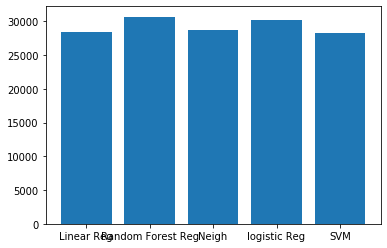

In [16]:

plt.bar([0,1,2,3,4],accuracies)
plt.xticks([0,1,2,3,4],['Linear Reg','Random Forest Reg','Neigh','logistic Reg','SVM'])
plt.show()

In [17]:
from sklearn.metrics import mean_squared_log_error

#linearRegRMSE  = mean_squared_log_error(y_test['SalePrice'], y_test['linearRegPred'])
linearRegRMSE =0.0
randomForRMSE = mean_squared_log_error(y_test['SalePrice'], y_test['RandomForest'])
neighRMSE = mean_squared_log_error(y_test['SalePrice'], y_test['neigh'])
logisRMSE = mean_squared_log_error(y_test['SalePrice'], y_test['logistic Reg'])
#svmRMSE = mean_squared_log_error(y_test['SalePrice'], y_test['svmReg'])
svmRMSE = 0.0
accuracies = [linearRegRMSE,randomForRMSE,neighRMSE,logisRMSE,svmRMSE]
accuracies

[0.0, 0.021109049159291928, 0.019147269905858126, 0.037625350715168863, 0.0]

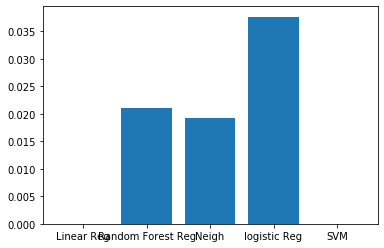

In [18]:

plt.bar([0,1,2,3,4],accuracies)
plt.xticks([0,1,2,3,4],['Linear Reg','Random Forest Reg','Neigh','logistic Reg','SVM'])
plt.show()

In [19]:
import numpy as np
kaggle_test = np.nan_to_num(kaggle_test)

In [20]:
kaggle_id

0       1461
1       1462
2       1463
3       1464
4       1465
        ... 
1454    2915
1455    2916
1456    2917
1457    2918
1458    2919
Name: Id, Length: 1459, dtype: int64

In [21]:
kaggle_price = RandomForest.predict(kaggle_test)

In [22]:
kaggle = pd.DataFrame(kaggle_id)

In [23]:
kaggle['SalePrice'] = kaggle_price

In [24]:
kaggle.to_csv('Kaggle.csv',index=False)
kaggle

,Id,SalePrice
0,1461,125930.511111
1,1462,154909.761111
2,1463,182870.077778
3,1464,180258.133333
4,1465,200547.022222
...,...,...
1454,2915,97410.577778
1455,2916,88709.444444
1456,2917,152472.172222
1457,2918,128312.777778
